In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load the dataset (modify the path if needed)
df = pd.read_csv("Deepression dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [5]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [6]:
print(df.isnull().sum())

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64


In [7]:
print(df.dtypes)

Number                 int64
Sleep                float64
Appetite             float64
Interest             float64
Fatigue              float64
Worthlessness        float64
Concentration        float64
Agitation            float64
Suicidal Ideation    float64
Sleep Disturbance    float64
Aggression           float64
Panic Attacks        float64
Hopelessness         float64
Restlessness         float64
Low Energy           float64
Depression State      object
dtype: object


In [8]:
df["Depression State"].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression', '\tModerate',
       '\tMild', '\tNo depression', '\tSevere', '2\tNo depression',
       '5\tNo depression', nan], dtype=object)

In [9]:
print(df["Depression State"].value_counts(dropna=False))

Depression State
NaN                 273
No depression       157
Mild                117
Moderate            109
Severe              108
\tNo depression      15
\tModerate           11
\tMild               11
\tSevere             10
2\tNo depression      1
5\tNo depression      1
Name: count, dtype: int64


In [10]:
df.shape

(813, 16)

In [11]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [12]:
# Define the incorrect values to drop
invalid_values = ["\tNo depression", "\tModerate", "\tMild", "\tSevere", "2\tNo depression", "5\tNo depression"]

# Drop rows where 'Depression State' is in the invalid values list
df = df[~df["Depression State"].isin(invalid_values)]

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Verify the updated value counts
print(df["Depression State"].value_counts(dropna=False))


Depression State
NaN              273
No depression    157
Mild             117
Moderate         109
Severe           108
Name: count, dtype: int64


In [13]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [14]:
# Define the mapping manually
label_mapping = {
    "No depression": 1,
    "Mild": 2,
    "Moderate": 3,
    "Severe": 4
}

# Replace categorical labels with numeric values
df["Depression State"] = df["Depression State"].map(label_mapping)

# Verify the updated values
print(df["Depression State"].value_counts(dropna=False))
print(df.head())


Depression State
NaN    273
1.0    157
2.0    117
3.0    109
4.0    108
Name: count, dtype: int64
   Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
0        1    1.0       1.0       1.0      5.0            5.0            1.0   
1        2    2.0       5.0       5.0      1.0            1.0            5.0   
2        3    5.0       2.0       2.0      2.0            2.0            2.0   
3        4    1.0       1.0       1.0      5.0            5.0            1.0   
4        5    2.0       5.0       5.0      1.0            1.0            5.0   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0        5.0                5.0                1.0         5.0            5.0   
1        1.0                1.0                5.0         1.0            1.0   
2        2.0                2.0                2.0         2.0            2.0   
3        5.0                5.0                1.0         5.0            5.0   
4        1.0    

In [15]:
df.shape

(764, 16)

In [16]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [17]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_rows = len(df)

    if null_count > 0:
        print(f"\nColumn '{col}' has {null_count} missing values.")

        # Fill with mode if null count is less than half the total rows
        if null_count < total_rows / 2:
            mode_value = df[col].mode()[0]  # Mode returns a Series, take the first value
            df.loc[:, col] = df[col].fillna(mode_value)  # ✅ Safe modification using loc
            print(f"Filled null values in '{col}' with mode: {mode_value}")
        else:
            print(f"Skipping '{col}' (too many nulls).")


Column 'Sleep' has 273 missing values.
Filled null values in 'Sleep' with mode: 5.0

Column 'Appetite' has 273 missing values.
Filled null values in 'Appetite' with mode: 5.0

Column 'Interest' has 273 missing values.
Filled null values in 'Interest' with mode: 5.0

Column 'Fatigue' has 273 missing values.
Filled null values in 'Fatigue' with mode: 5.0

Column 'Worthlessness' has 273 missing values.
Filled null values in 'Worthlessness' with mode: 5.0

Column 'Concentration' has 273 missing values.
Filled null values in 'Concentration' with mode: 5.0

Column 'Agitation' has 273 missing values.
Filled null values in 'Agitation' with mode: 5.0

Column 'Suicidal Ideation' has 273 missing values.
Filled null values in 'Suicidal Ideation' with mode: 5.0

Column 'Sleep Disturbance' has 273 missing values.
Filled null values in 'Sleep Disturbance' with mode: 5.0

Column 'Aggression' has 273 missing values.
Filled null values in 'Aggression' with mode: 5.0

Column 'Panic Attacks' has 273 miss

In [18]:
# Final check
print("\nUpdated Null Values After Filling:")
print(df.isnull().sum())


Updated Null Values After Filling:
Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64


In [19]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed.")


Number of duplicate rows: 0


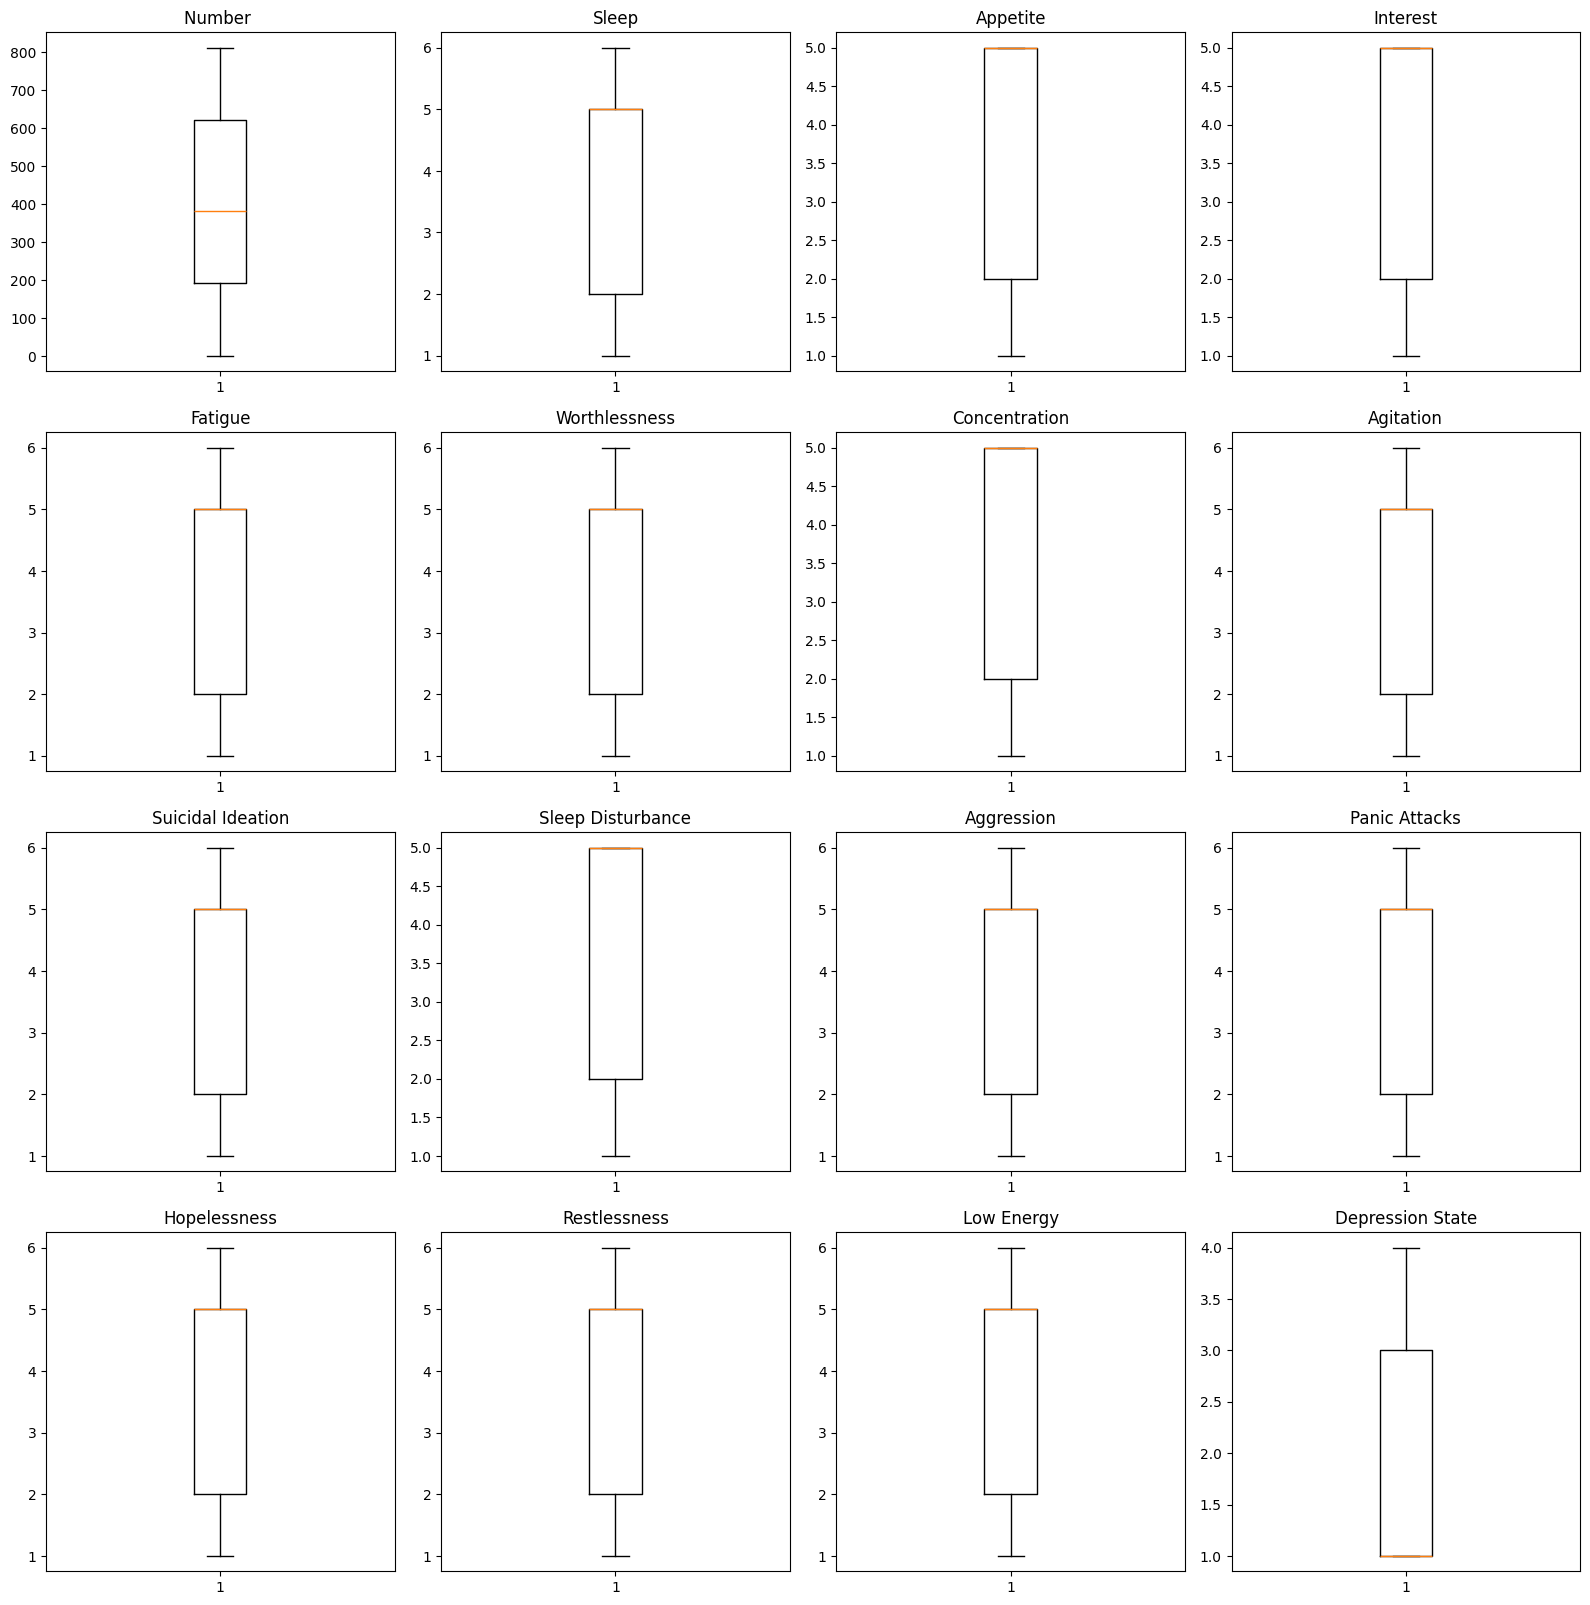

In [20]:
plt.figure(figsize=(16, len(df) // 4 * 4 + 4))
for i, col in enumerate(df, start=1):
    plt.subplot(len(df) // 4 + 1, 4, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

In [21]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

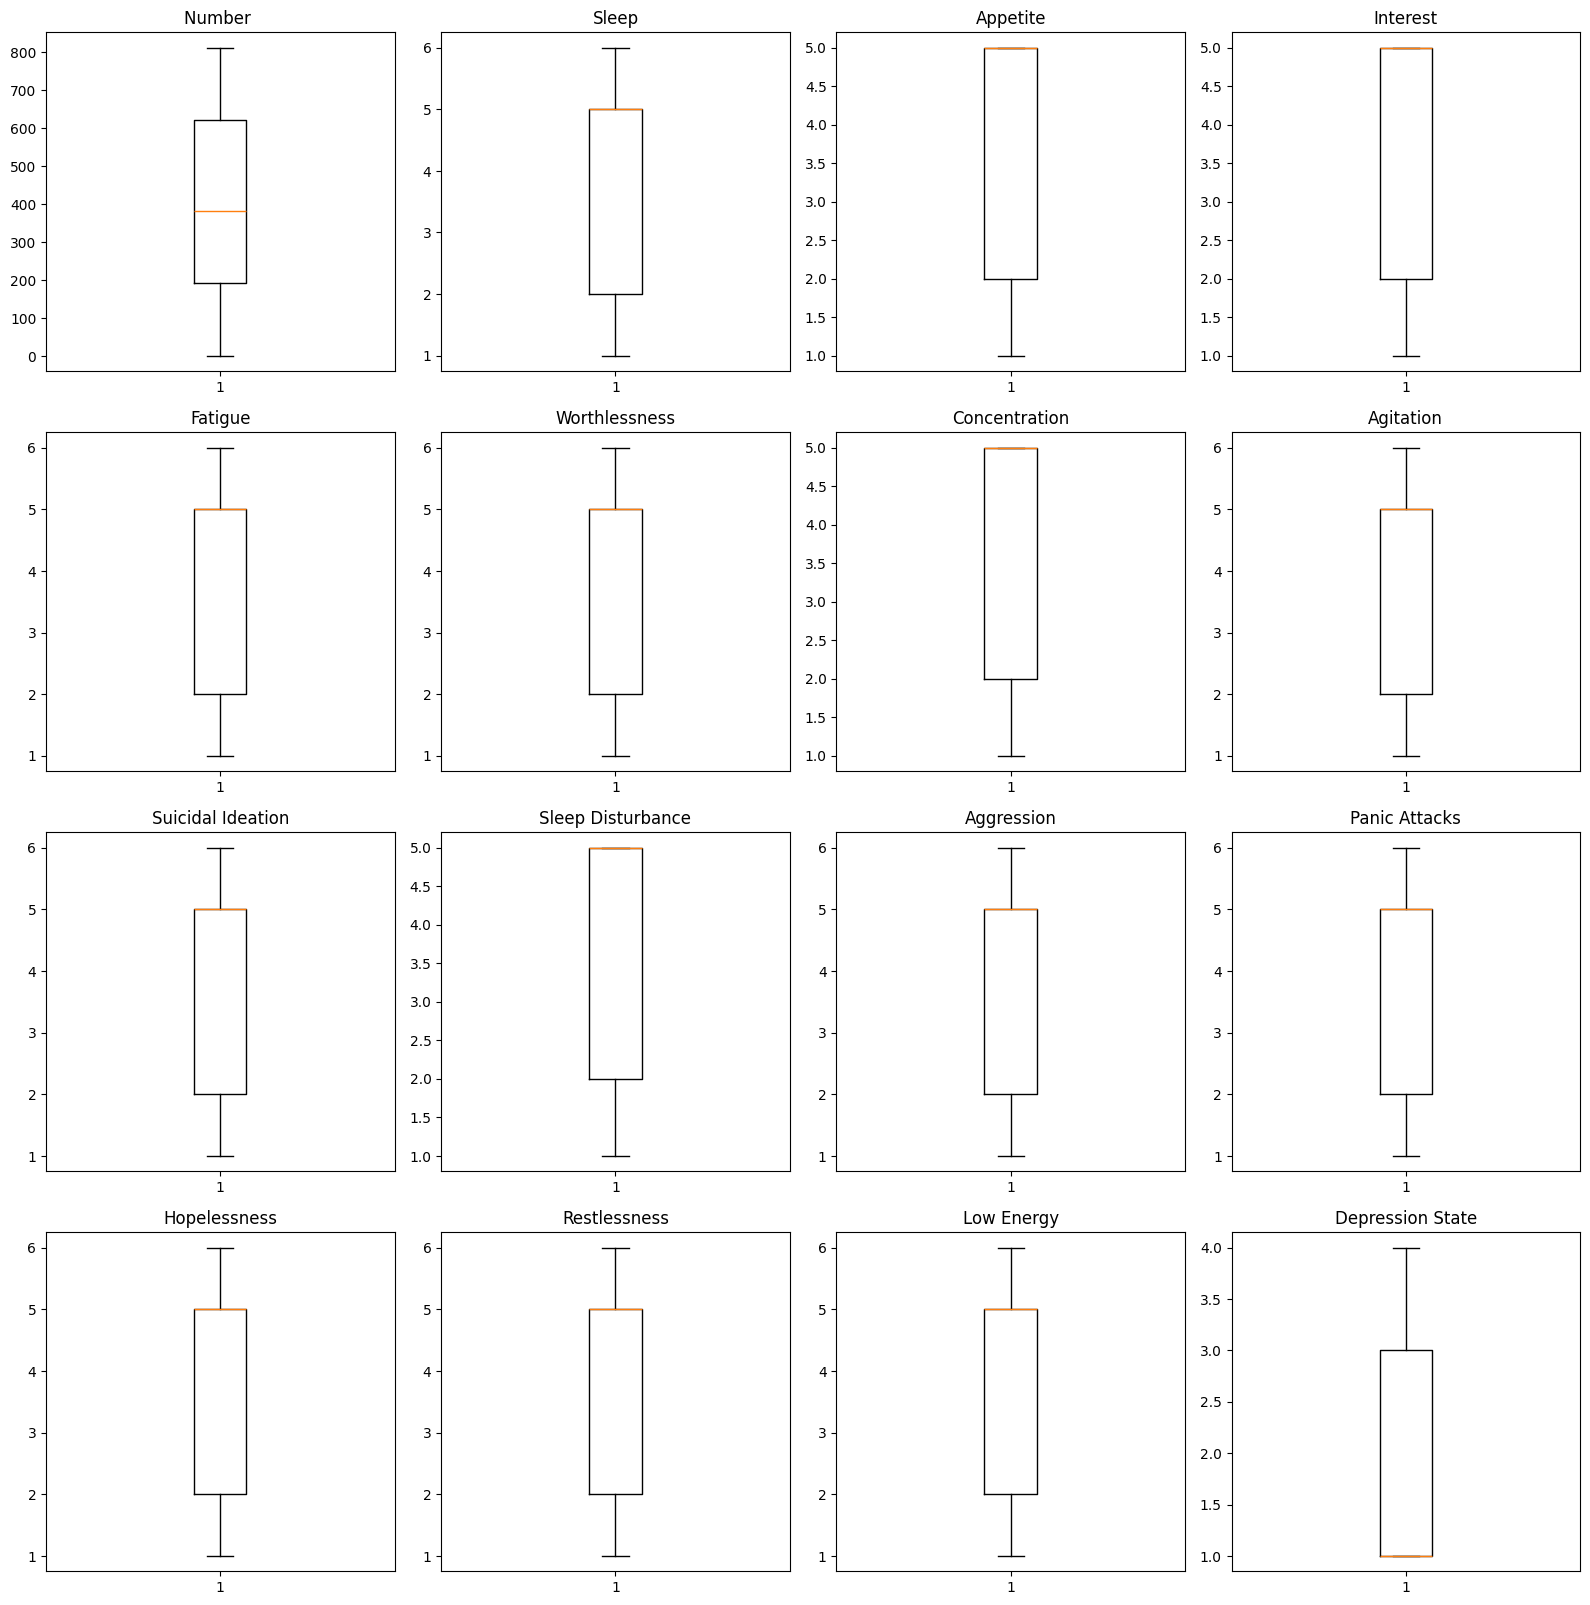

In [22]:
plt.figure(figsize=(16, len(df) // 4 * 4 + 4))
for i, col in enumerate(df, start=1):
    plt.subplot(len(df) // 4 + 1, 4, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

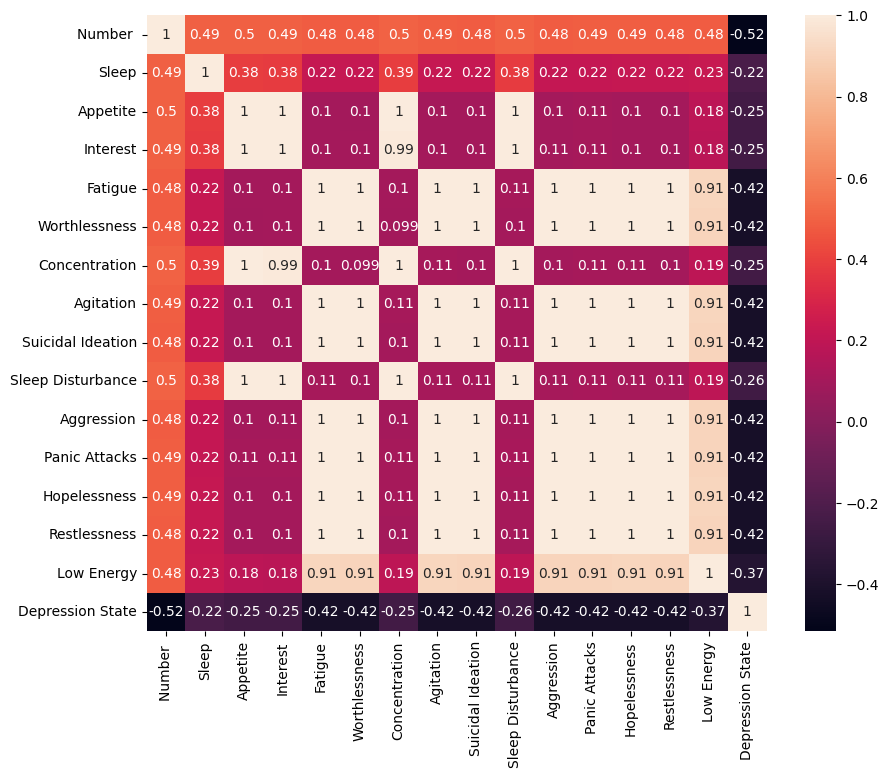

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df.drop(columns=["Depression State"])  # Replace 'target_column' with your actual target column name
y = df["Depression State"]

# Split into training (70%) and temp (30%) [which will be split into validation & test]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temp into validation (15%) and test (15%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the sizes of each split
print(f"Train set: {X_train.shape}, Validation set: {X_valid.shape}, Test set: {X_test.shape}")


Train set: (534, 15), Validation set: (115, 15), Test set: (115, 15)


Decision Tree - Validation Accuracy: 0.5304
Decision Tree - Test Accuracy: 0.6087


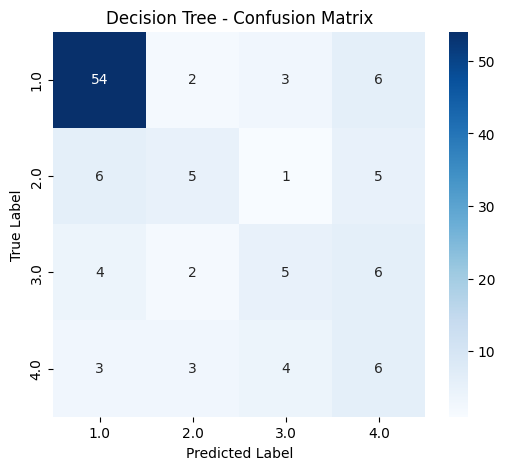

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred_dt = dt_model.predict(X_valid)

# Evaluate performance
accuracy_dt = accuracy_score(y_valid, y_valid_pred_dt)
print(f"Decision Tree - Validation Accuracy: {accuracy_dt:.4f}")

# Predict on the test set
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate test accuracy
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree - Test Accuracy: {test_accuracy_dt:.4f}")

# Confusion matrix for test set
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_valid), yticklabels=set(y_valid))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Random Forest - Validation Accuracy: 0.5217
Random Forest - Test Accuracy: 0.6087


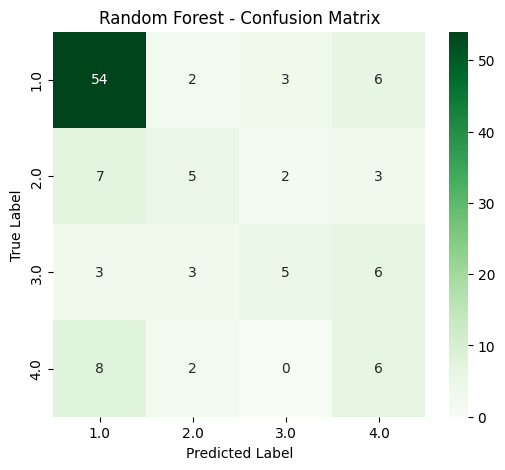

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred_rf = rf_model.predict(X_valid)

# Evaluate performance
accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print(f"Random Forest - Validation Accuracy: {accuracy_rf:.4f}")

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.4f}")

# Confusion matrix for validation set
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_valid), yticklabels=set(y_valid))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest - Confusion Matrix")
plt.show()


SVM - Validation Accuracy: 0.5565
SVM - Test Accuracy: 0.5652


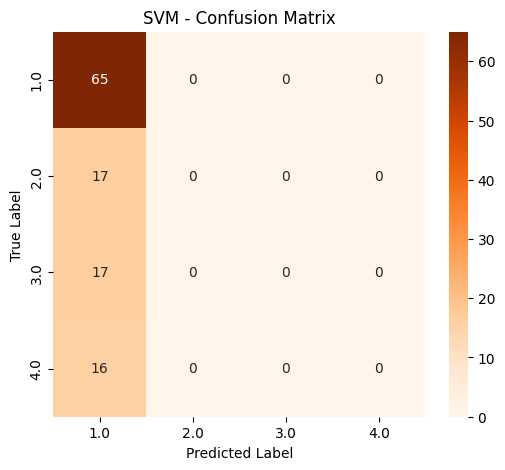

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can try 'linear', 'poly', 'rbf', etc.
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred_svm = svm_model.predict(X_valid)

# Evaluate performance
accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)
print(f"SVM - Validation Accuracy: {accuracy_svm:.4f}")

# Predict on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate test accuracy
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM - Test Accuracy: {test_accuracy_svm:.4f}")

# Confusion matrix for validation set
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=set(y_valid), yticklabels=set(y_valid))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM - Confusion Matrix")
plt.show()


KNN - Validation Accuracy: 0.4783
KNN - Test Accuracy: 0.5217


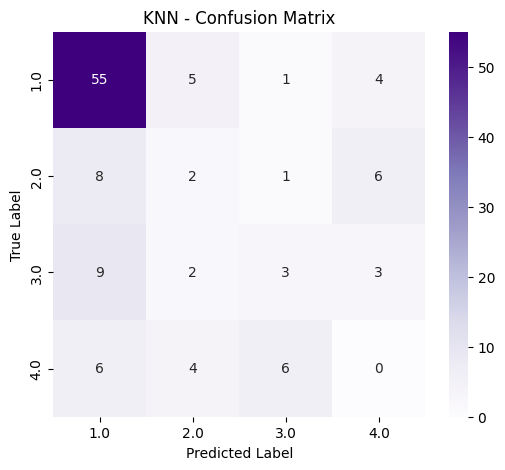

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred_knn = knn_model.predict(X_valid)

# Evaluate performance
accuracy_knn = accuracy_score(y_valid, y_valid_pred_knn)
print(f"KNN - Validation Accuracy: {accuracy_knn:.4f}")

# Predict on the test set
y_test_pred_knn = knn_model.predict(X_test)

# Evaluate test accuracy
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"KNN - Test Accuracy: {test_accuracy_knn:.4f}")

# Confusion matrix for validation set
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', xticklabels=set(y_valid), yticklabels=set(y_valid))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN - Confusion Matrix")
plt.show()


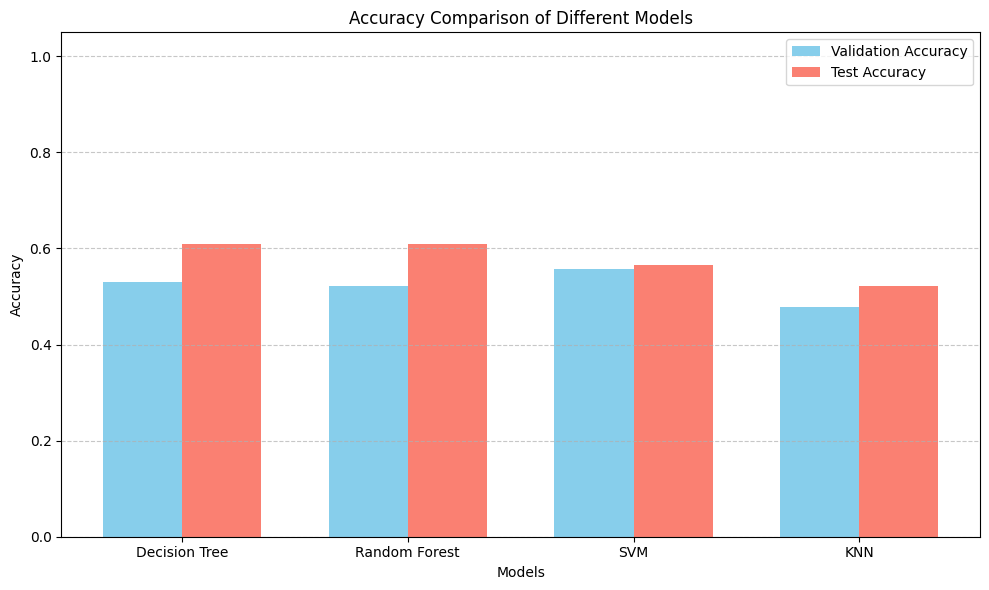

In [30]:
import matplotlib.pyplot as plt

# Collect validation and test accuracies
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']
val_accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn]
test_accuracies = [test_accuracy_dt, test_accuracy_rf, test_accuracy_svm, test_accuracy_knn]

# Plot the bar chart
x = range(len(model_names))
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x, val_accuracies, width=width, label='Validation Accuracy', color='skyblue')
plt.bar([i + width for i in x], test_accuracies, width=width, label='Test Accuracy', color='salmon')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks([i + width / 2 for i in x], model_names)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


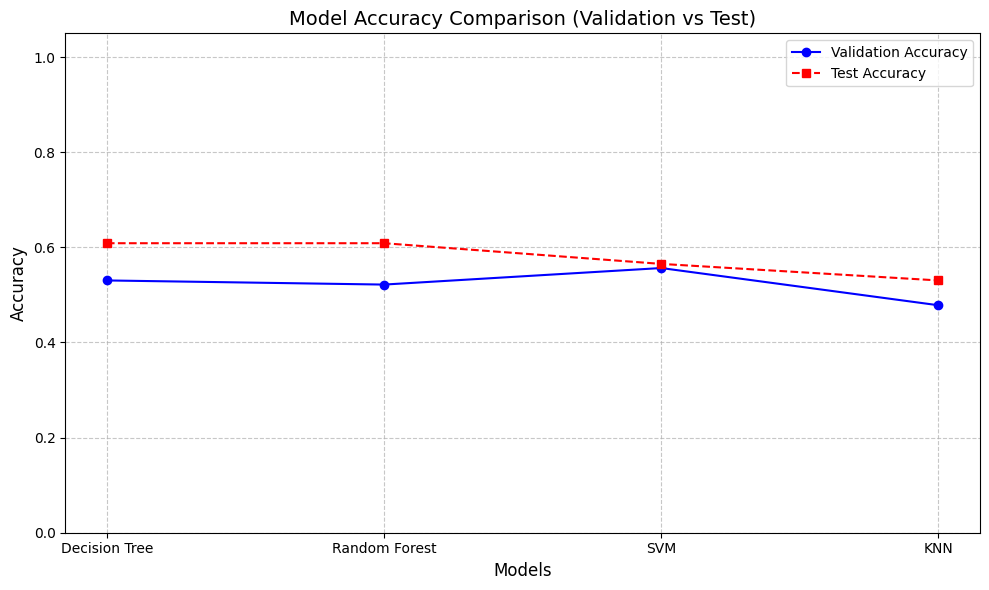

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']
val_accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn]
test_accuracies = [test_accuracy_dt, test_accuracy_rf, test_accuracy_svm, test_accuracy_knn]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, val_accuracies, marker='o', linestyle='-', color='blue', label='Validation Accuracy')
plt.plot(model_names, test_accuracies, marker='s', linestyle='--', color='red', label='Test Accuracy')

# Enhancing the plot
plt.title('Model Accuracy Comparison (Validation vs Test)', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


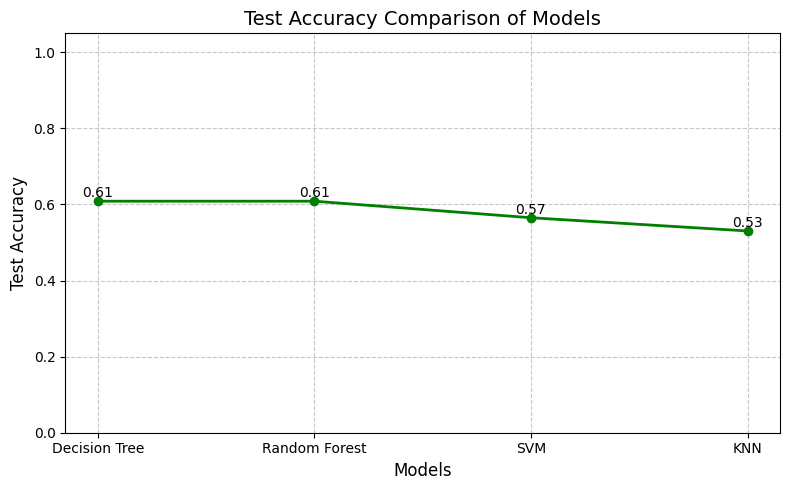

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding test accuracies
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']
test_accuracies = [test_accuracy_dt, test_accuracy_rf, test_accuracy_svm, test_accuracy_knn]

# Plotting the line graph for test accuracy
plt.figure(figsize=(8, 5))
plt.plot(model_names, test_accuracies, marker='o', linestyle='-', color='green', linewidth=2)

# Adding value annotations on the points
for i, acc in enumerate(test_accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

# Enhancing the plot
plt.title('Test Accuracy Comparison of Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
